<a href="https://colab.research.google.com/github/ravadhani/NLP/blob/main/TopicModelling_Spacy%26LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic Modelling

In [2]:
!gdown 1gGazb-hGBiJnVy4WCoWFOFfzPdhlmqrV

Downloading...
From: https://drive.google.com/uc?id=1gGazb-hGBiJnVy4WCoWFOFfzPdhlmqrV
To: /content/Musical_Instruments_5.json
100% 7.45M/7.45M [00:00<00:00, 69.7MB/s]


In [3]:
import pandas as pd
import numpy as np

review_df = pd.read_json("Musical_Instruments_5.json", lines=True)
review_df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
review_df.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

From above observation, we can see that the date format is not proper. We can fix it.

In [5]:
review_df["reviewTime"] = pd.to_datetime(review_df['reviewTime'], format="%m %d, %Y")

In [6]:
review_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,2014-02-28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,2013-03-16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,2014-02-21


<Axes: >

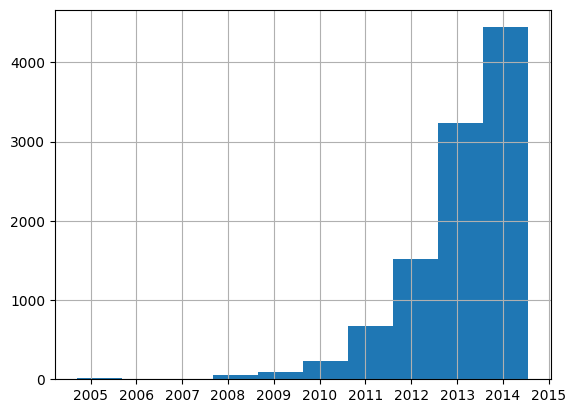

In [9]:
review_df['reviewTime'].hist()

From the above plot, we can see that reviews have been there from 2005 to 2014. With most of the reviews from the recent years.

<Axes: >

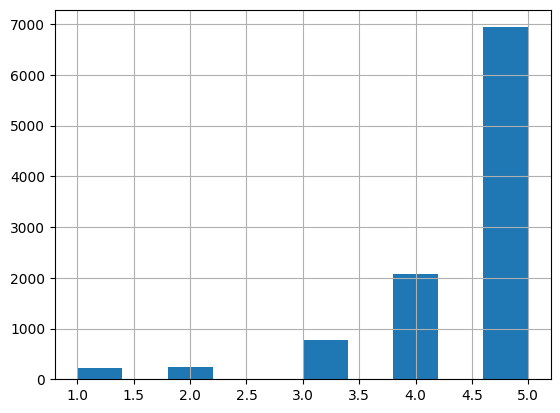

In [10]:
review_df['overall'].hist()

Majority of review seem to be positive. Anyways in this case study we are not worried about the sentiment or ratings.

Our focus is on the review content to find out what is spoken of in the reviews.
  *   To achieve this we can do a simple word counter and see the top 10 words



In [7]:
#installing nltk, spacy and wordcloud

!pip install nltk
!pip install worcloud

import nltk
nltk.download('all')

ERROR: Could not find a version that satisfies the requirement worcloud (from versions: none)
ERROR: No matching distribution found for worcloud


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [8]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from matplotlib import pyplot as plt

def wordcloud_plot(counter_all):
  w = WordCloud().generate_from_frequencies(frequencies=dict(counter_all))
  plt.imshow(w, interpolation='bilinear')
  plt.axis('off')
  plt.show()

def tokenize(text):
  tokens = [w for w in word_tokenize(text.lower())]
  return tokens

In [9]:
from collections import Counter

def flatten(list_of_lists):
  flat_list = []
  for l in list_of_lists:
    flat_list.extend(l)
  return flat_list

counter_all = Counter(flatten(review_df['reviewText'].apply(tokenize).tolist()))
counter_all.most_common(10)

[('.', 47091),
 ('the', 44092),
 (',', 35705),
 ('i', 30997),
 ('a', 27895),
 ('and', 26984),
 ('it', 24119),
 ('to', 23038),
 ('is', 14943),
 ('of', 13588)]

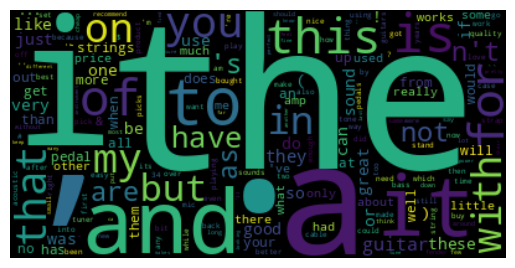

In [10]:
wordcloud_plot(counter_all)

As we can see from the above tabular data and the word cloud, the most common words seems to be the stopwords.

We can improve this by removing the stopwords and better word tokenization

In [11]:
from nltk.corpus import stopwords

english_stopwords = set(stopwords.words('english'))

In [12]:
def tokenize_clean(text):
  tokens = [w for w in word_tokenize(text.lower()) if w not in english_stopwords and w.isalpha()]
  return tokens

In [13]:
counter_all = Counter(flatten(review_df['reviewText'].apply(tokenize_clean).tolist()))
counter_all.most_common(10)

[('guitar', 5472),
 ('one', 4402),
 ('great', 4026),
 ('like', 3897),
 ('use', 3724),
 ('good', 3720),
 ('sound', 3507),
 ('strings', 3349),
 ('well', 3042),
 ('get', 2657)]

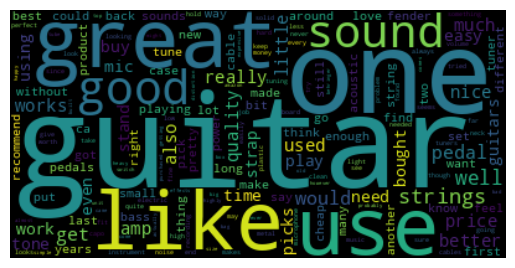

In [15]:
wordcloud_plot(counter_all)

This cloud is much better than the previous one. But it is still not very informative, the only useful things we can see are "guitar" and "strings".

In [16]:
!pip install gensim
!pip install pyLDAvis
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.2 MB/s eta 0:00:00



*   One thing to do is removing the not so useful words from the vocabulary.
*   The other thing to do is, as the reviews are in English, we can use the grammer concepts here to extract all Nouns from the reviews.
*   This can be done using "spacy"



In [17]:
#installing spacy
!pip install spacy
!python -m spacy download en_core_web_sm   #en_core_web_sm is for english model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Loading the english model

In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")

Using spacy on one review and exploring it

In [19]:
review_sample = review_df['reviewText'].iloc[0]
review_sample

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"

In [20]:
spacy_process_review = nlp(review_sample)
spacy_process_review

Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,

Spacy has returned a custom spacy document object which is already tokenized and is a token object.

Token object has lot of properties that we can use.



In [21]:
type(spacy_process_review)

spacy.tokens.doc.Doc

In [22]:
spacy_process_review[0], type(spacy_process_review[0])

(Not, spacy.tokens.token.Token)

Spacy uses a pre-trained model to identify the POS (parts of speech).
Using spacy, now we can identify all nouns as they are our words of interest

In [23]:
spacy_process_review[0].pos_

'PART'

The word "not" is a particle here and so we got the POS as 'PART'
We can do POS tagging for the rest of the words to see

In [24]:
for token in spacy_process_review:
  if token.pos_ in ['NOUN', 'PROPN']:
    print(token, token.pos_)

filters NOUN
pop NOUN
sounds NOUN
recordings NOUN
prices NOUN
filters NOUN
amazon PROPN
pricing NOUN


This looks good, but there is still a problem. If we notice pop and sounds -> they both belong to a same noun phrase 'pop sounds'
We can use constituency parsing which has rules based on CFG(Context Free Grammar) and Finite Automata concepts

We will take all noun phrases and then filter them by nouns and pronouns.

In [25]:
for c in spacy_process_review.noun_chunks:
  print(c, [t.pos_ for t in c])

it ['PRON']
exactly what ['ADV', 'PRON']
it ['PRON']
filters ['NOUN']
the pop sounds ['DET', 'NOUN', 'NOUN']
my recordings ['PRON', 'NOUN']
it ['PRON']
the lowest prices ['DET', 'ADJ', 'NOUN']
filters ['NOUN']
amazon ['PROPN']
it ['PRON']
they ['PRON']
their pricing ['PRON', 'NOUN']


In [26]:
noun_checker = lambda x: any()
noun_checker

<function __main__.<lambda>(x)>

In [27]:
for c in spacy_process_review.noun_chunks:
  new_nc = [t.text for t in c if t.pos_ in ['NOUN', 'PROPN']]
  if new_nc:
    print(new_nc)

['filters']
['pop', 'sounds']
['recordings']
['prices']
['filters']
['amazon']
['pricing']


This we have done so far for the sample review. Now we can do this for all the reviews and see the result.

In [28]:
def get_noun_phrases(text):
  doc = nlp(text)
  required_nc = []
  for c in doc.noun_chunks:
    new_nc = [t.text for t in c if t.pos_ in ["NOUN", "PROPN"]]
    if new_nc:
      new_nc_text = " ".join(new_nc)
      required_nc.append(new_nc_text)
  return required_nc

In [29]:
from tqdm.auto import tqdm
tqdm.pandas()

In [30]:
review_df['noun_phrases'] = review_df['reviewText'].progress_apply(get_noun_phrases)


  0%|          | 0/10261 [00:00<?, ?it/s]

In [32]:
review_df['noun_phrases']

0        [filters, pop sounds, recordings, prices, filt...
1        [product, bonus, screens, hint, smell, grape c...
2        [job, device, breath, popping sound, voice, re...
3        [pops, thing, gooseneck, screen, position, pos...
4                [pop filter, studio filter, vocals, pops]
                               ...                        
10256                                                   []
10257    [Nanoweb strings, while, price, strings, comme...
10258    [strings, past, Elixirs, disconnect, guitar, c...
10259    [Elixir, DEVELOPED, Taylor Guitars, strings, R...
10260    [strings, strings, complaint, strings, strings...
Name: noun_phrases, Length: 10261, dtype: object

Now that we selectively chose useful words, we can run a most common word count on this.

In [33]:
counter_all = Counter(flatten(review_df['noun_phrases'].tolist()))
counter_all.most_common(10)

[('guitar', 3172),
 ('strings', 2543),
 ('price', 1793),
 ('sound', 1746),
 ('pedal', 1517),
 ('one', 1355),
 ('amp', 1159),
 ('time', 1103),
 ('tone', 1029),
 ('guitars', 987)]

We come to know what is mentioned in the reviews. Most of them are talking about guitar and strings.

But we still dont know what is about guitar and strings.

This can achieved throubh Dependency Parsing

The below bethod gets the root word for each noun-phrase

In [34]:
def get_noun_phrases_parent(text):
  doc = nlp(text)
  required_nc = []
  for c in doc.noun_chunks:
    nc_parent = c.root.head
    new_nc = [t.text for t in c if t.pos_ in ["NOUN", "PROPN"]]
    if new_nc:
      new_nc_text = " ".join(new_nc) + "->" + nc_parent.text
      required_nc.append(new_nc_text)
  return required_nc

In [35]:
review_df['noun_phrases_parent'] = review_df['reviewText'].progress_apply(get_noun_phrases_parent)

  0%|          | 0/10261 [00:00<?, ?it/s]

In [37]:
counter_all = Counter(flatten(review_df['noun_phrases_parent'].tolist()))
counter_all.most_common(10)

[('price->for', 580),
 ('years->for', 501),
 ('guitar->on', 396),
 ('thing->is', 356),
 ('strings->are', 276),
 ('pedal->is', 259),
 ('tune->in', 254),
 ('guitar->of', 253),
 ('job->does', 250),
 ('strings->of', 238)]

The above representation is also not very helpful.

There is a special algorithm called LDA just for Topic modelling. We can use this algorithm to get the topics in a much better way.

In [38]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

In [39]:
tokenized_clean_reviews = review_df['reviewText'].apply(tokenize_clean)

In [40]:
tokenized_clean_reviews

0        [much, write, exactly, supposed, filters, pop,...
1        [product, exactly, quite, realized, double, sc...
2        [primary, job, device, block, breath, would, o...
3        [nice, windscreen, protects, mxl, mic, prevent...
4        [pop, filter, great, looks, performs, like, st...
                               ...                        
10256                             [great, expected, thank]
10257    [thinking, trying, nanoweb, strings, bit, put,...
10258    [tried, coated, strings, past, including, elix...
10259    [well, made, elixir, developed, taylor, guitar...
10260    [strings, really, quite, good, would, call, pe...
Name: reviewText, Length: 10261, dtype: object

We can then directly use the doc2bow of the vocabulary to convert the document to a BOW

In [41]:
vocabulary = Dictionary(tokenized_clean_reviews)
vocabulary

In [42]:
bag_of_words_documents = [vocabulary.doc2bow(text) for text in tokenized_clean_reviews]
bag_of_words_documents  # BOW is a numerical representation of data, so it can be fed to machine learning algos

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1)],
 [(1, 2),
  (4, 1),
  (10, 1),
  (11, 2),
  (17, 1),
  (18, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 2),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(29, 1),
  (32, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)

Lets train 10 topics now.
i.e. # topis = 10

In [43]:
lda = LdaModel(bag_of_words_documents, num_topics=10, id2word=vocabulary)

Lets print the topics that are being talkied about.
The number in front of each word represents the contribution of that word to the topic

In [44]:
lda.print_topics()

[(0,
  '0.030*"stand" + 0.016*"would" + 0.016*"guitar" + 0.014*"one" + 0.010*"like" + 0.010*"good" + 0.008*"easy" + 0.008*"great" + 0.007*"guitars" + 0.007*"use"'),
 (1,
  '0.040*"strap" + 0.031*"tascam" + 0.015*"like" + 0.015*"picks" + 0.014*"guitar" + 0.014*"good" + 0.011*"leather" + 0.011*"great" + 0.010*"apogee" + 0.010*"button"'),
 (2,
  '0.015*"pedal" + 0.014*"sound" + 0.013*"amp" + 0.011*"like" + 0.009*"get" + 0.009*"great" + 0.009*"one" + 0.008*"use" + 0.008*"tone" + 0.008*"good"'),
 (3,
  '0.018*"power" + 0.014*"use" + 0.011*"one" + 0.011*"great" + 0.010*"pedals" + 0.009*"quality" + 0.008*"pedal" + 0.008*"good" + 0.007*"cables" + 0.007*"price"'),
 (4,
  '0.009*"use" + 0.008*"one" + 0.008*"interface" + 0.008*"quality" + 0.008*"well" + 0.006*"recording" + 0.006*"input" + 0.006*"good" + 0.006*"pedal" + 0.006*"get"'),
 (5,
  '0.090*"strings" + 0.026*"guitar" + 0.014*"sound" + 0.013*"string" + 0.013*"guitars" + 0.010*"set" + 0.009*"gauge" + 0.009*"play" + 0.009*"tune" + 0.009*"grea

We can see that the topics are about Mics, Guitars, Guitar Capos, Guitar picks, Tuning, Pedels and Amp etc.

#Summary:



*   POS tagging helps find out grammatical parts of speech for a particular word in the text
*   We used Spacy for POS tagging
*   Spacy uses Probablistic HMM or Sequenctial Neural Networks to perform POS tagging
*   Constituency parsing and Dependecy trees can also be used for Topic modelling like we did above. However these models have their limitations
*   LDA (Latent Dirichlet Algorithm) is powerful algorithm which can used for Topic modelling.
*   As we did above, it is simple to use and results are also better.



